In [ ]:
#Answer 1

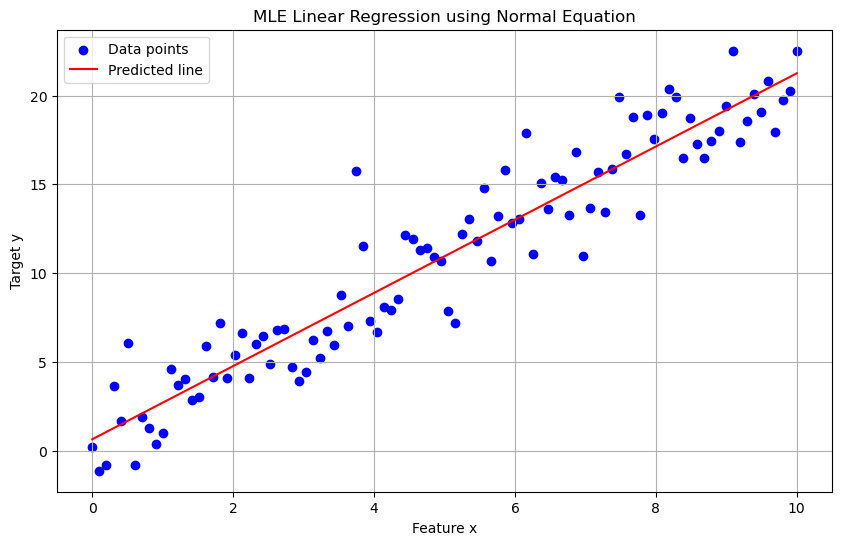

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_mle_theta(x, y):
    X_b = np.c_[np.ones((x.shape[0], 1)), x] 
    theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    return theta_best

x = np.linspace(0, 10, 100)
true_slope = 2
true_intercept = 1
y = true_slope * x + true_intercept + np.random.randn(100) * 2 

theta = calculate_mle_theta(x, y)

X_b = np.c_[np.ones((x.shape[0], 1)), x] 
y_pred = X_b @ theta  

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Predicted line')
plt.title('MLE Linear Regression using Normal Equation')
plt.xlabel('Feature x')
plt.ylabel('Target y')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Answer 2

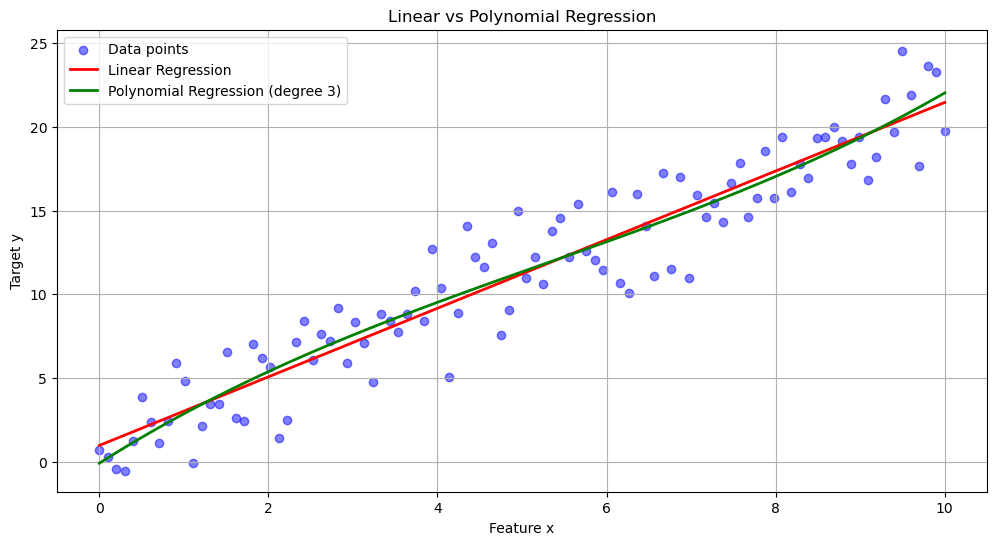

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def calculate_mle_theta(x, y):
    X_b = np.c_[np.ones((x.shape[0], 1)), x] 
    theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    return theta_best
    
x = np.linspace(0, 10, 100).reshape(-1, 1)
true_slope = 2
true_intercept = 1
y = true_slope * x.flatten() + true_intercept + np.random.randn(100) * 2 

theta_linear = calculate_mle_theta(x, y)

X_b_linear = np.c_[np.ones((x.shape[0], 1)), x] 
y_pred_linear = X_b_linear @ theta_linear

degree = 3 
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(x)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Data points', alpha=0.5)
plt.plot(x, y_pred_linear, color='red', label='Linear Regression', linewidth=2)
plt.plot(x, y_pred_poly, color='green', label=f'Polynomial Regression (degree {degree})', linewidth=2)
plt.title('Linear vs Polynomial Regression')
plt.xlabel('Feature x')
plt.ylabel('Target y')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Answer 3

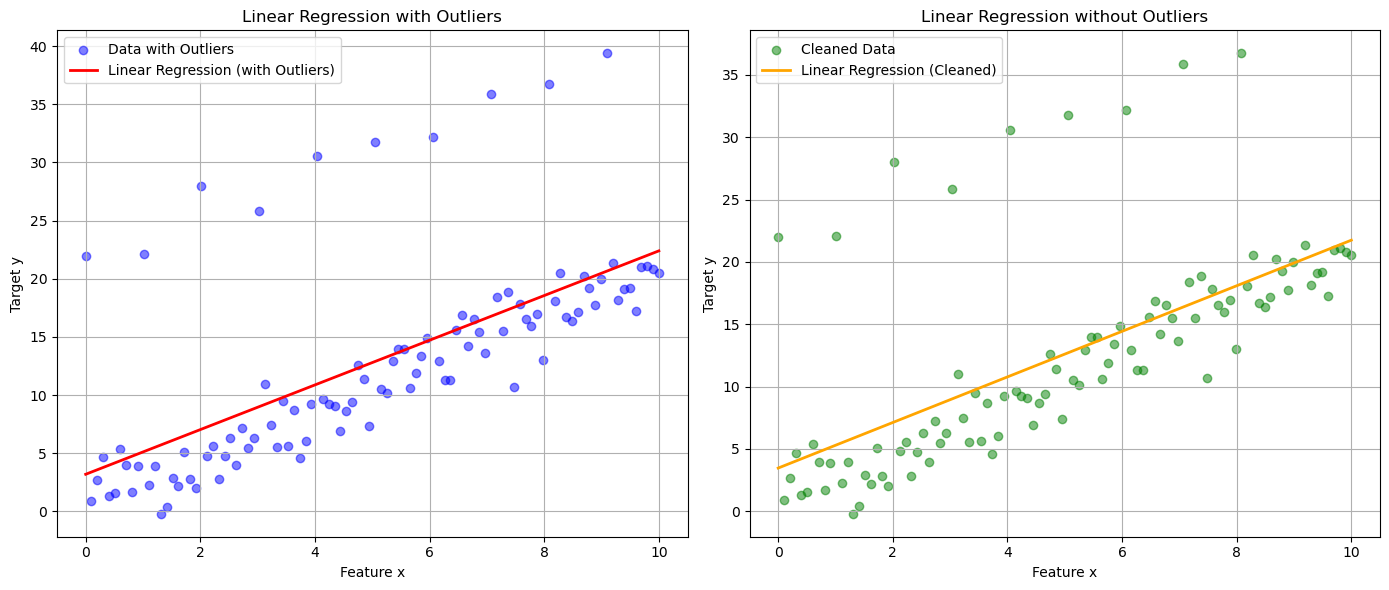

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

np.random.seed(42)
x = np.linspace(0, 10, 100).reshape(-1, 1)
true_slope = 2
true_intercept = 1
y = true_slope * x.flatten() + true_intercept + np.random.randn(100) * 2

y_with_outliers = np.copy(y)
y_with_outliers[::10] += 20 

model_with_outliers = LinearRegression()
model_with_outliers.fit(x, y_with_outliers)
y_pred_with_outliers = model_with_outliers.predict(x)

z_scores = np.abs(stats.zscore(y_with_outliers))
threshold = 3 
outliers = np.where(z_scores > threshold)[0]

x_clean = np.delete(x, outliers, axis=0)
y_clean = np.delete(y_with_outliers, outliers)

model_clean = LinearRegression()
model_clean.fit(x_clean, y_clean)
y_pred_clean = model_clean.predict(x)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(x, y_with_outliers, color='blue', label='Data with Outliers', alpha=0.5)
plt.plot(x, y_pred_with_outliers, color='red', label='Linear Regression (with Outliers)', linewidth=2)
plt.title('Linear Regression with Outliers')
plt.xlabel('Feature x')
plt.ylabel('Target y')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(x_clean, y_clean, color='green', label='Cleaned Data', alpha=0.5)
plt.plot(x, y_pred_clean, color='orange', label='Linear Regression (Cleaned)', linewidth=2)
plt.title('Linear Regression without Outliers')
plt.xlabel('Feature x')
plt.ylabel('Target y')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [8]:
#gitid: SandipanDasDIAT
#file path: Assignment-AM609/24-14-09_SandipanDas.ipynb